# **Import Modules**

In [ ]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')
from keras import utils

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mahaksahu001","key":"267fca3c72a7bf93d57fda817cbc3a6c"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
 96% 412M/428M [00:03<00:00, 126MB/s] 
100% 428M/428M [00:03<00:00, 133MB/s]


In [ ]:
!unzip toronto-emotional-speech-set-tess.zip -d /content/TESS

Streaming output truncated to the last 5000 lines.
  inflating: /content/TESS/TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav  
  inflating: /content/TESS/TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: /content/TESS/TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: /content/TESS/TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: /content/TESS/TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: /content/TESS/TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: /content/TESS/TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: /content/TESS/TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: /content/TESS/TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: /content/TESS/TESS Toronto emotional speech set data/OAF_angry/OA

In [ ]:
import os

# Lists to store file paths and corresponding labels
paths = []
labels = []

# Specify the path to the local dataset directory
dataset_path = '/content/TESS/tess toronto emotional speech set data'  # Update this path if your dataset is in a different location

# Walk through the dataset directory to gather file paths and labels
for dirname, _, filenames in os.walk(dataset_path):
    for filename in filenames:
        if filename.endswith('.wav'):  # Adjust file extension as needed
            # Get the full path of the file
            full_path = os.path.join(dirname, filename)
            paths.append(full_path)
            # paths.append(os.path.join(dirname, filename))

            # Assuming labels are in the directory name
            label = os.path.basename(dirname)  # Extract label from directory name
            # labels.append(label)

            # Optionally print the filename and label for verification
            # print(f"File: {filename}, Label: {label}")
            label = filename.split('_')[-1]
            # print(label)
            label = label.split('.')[0]
            labels.append(label.lower())
print("Dataset is Loaded")

# Now 'paths' contains all file paths, and 'labels' contains the corresponding labels


Dataset is Loaded


In [ ]:
paths[:5]

['/content/TESS/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_dead_sad.wav',
 '/content/TESS/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_king_sad.wav',
 '/content/TESS/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_search_sad.wav',
 '/content/TESS/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_pole_sad.wav',
 '/content/TESS/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_rain_sad.wav']

In [ ]:
labels[:5]

['sad', 'sad', 'sad', 'sad', 'sad']

In [ ]:
# dataframe
df=pd.DataFrame()
df['speech']=paths
df['label']=labels
df.head()

,speech,label
0,/content/TESS/tess toronto emotional speech se...,sad
1,/content/TESS/tess toronto emotional speech se...,sad
2,/content/TESS/tess toronto emotional speech se...,sad
3,/content/TESS/tess toronto emotional speech se...,sad
4,/content/TESS/tess toronto emotional speech se...,sad


In [ ]:
df['label'].value_counts()

,count
label,
sad,400
neutral,400
happy,400
fear,400
disgust,400
ps,400
angry,400


# **Exploratory Data Analysis**

Text(0.5, 1.0, 'Countplot for Labels')

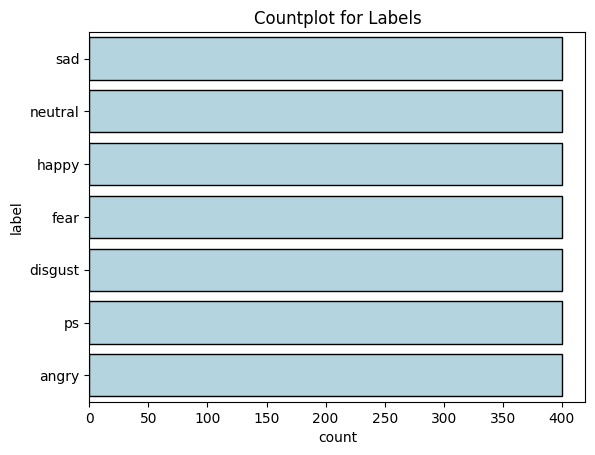

In [ ]:
sns.countplot(df['label'],color='lightblue',edgecolor='black')
plt.title('Countplot for Labels')

In [ ]:
def waveshow(data, sr, emotion):
    plt.figure(figsize=(10, 4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb=librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(10, 4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

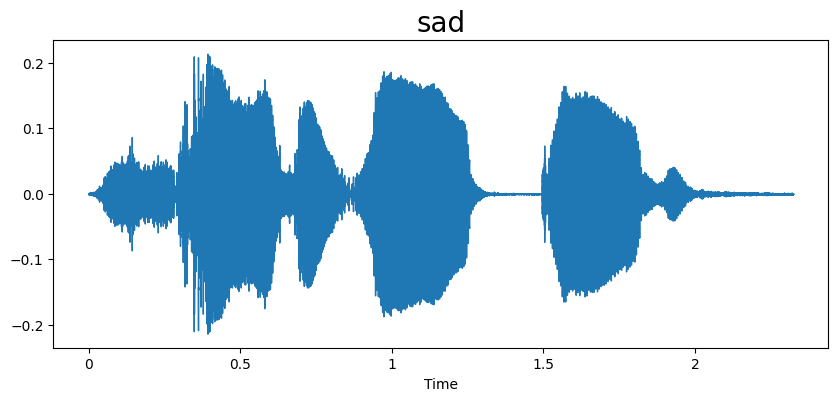

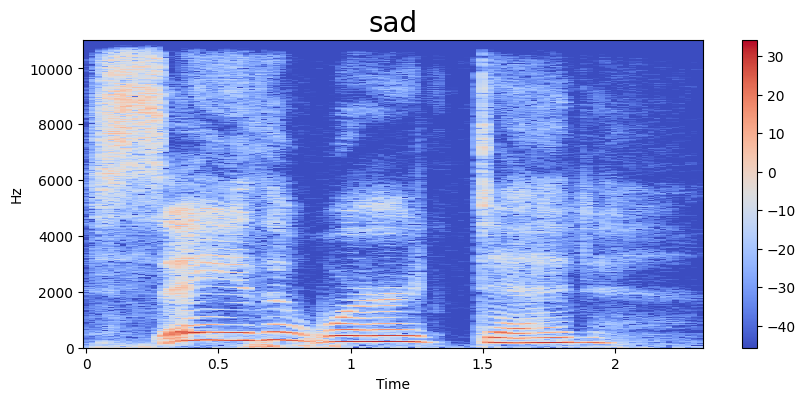

In [ ]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

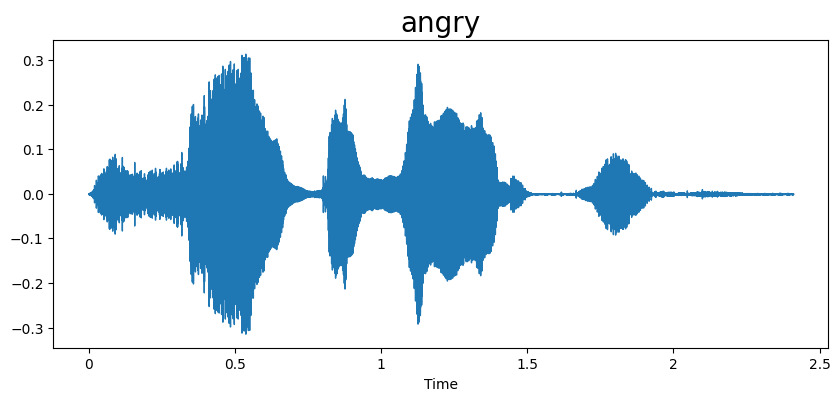

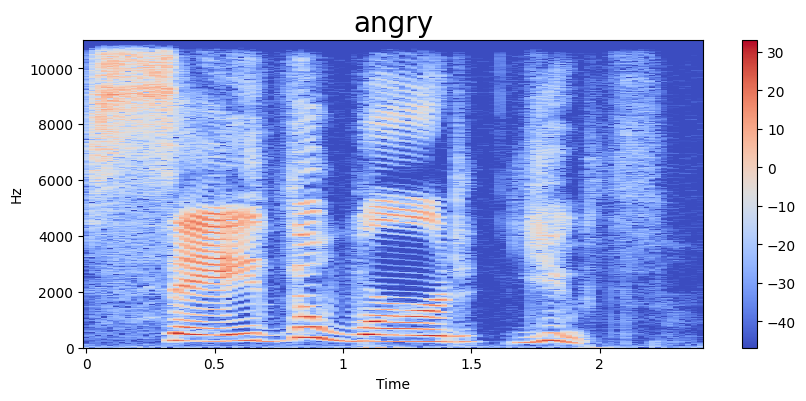

In [ ]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

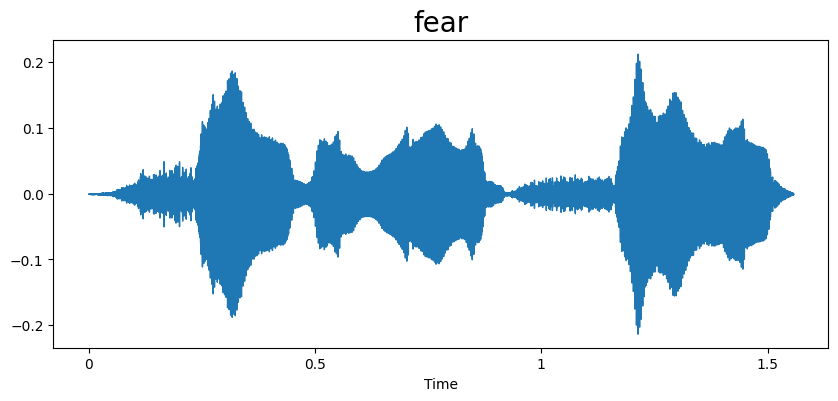

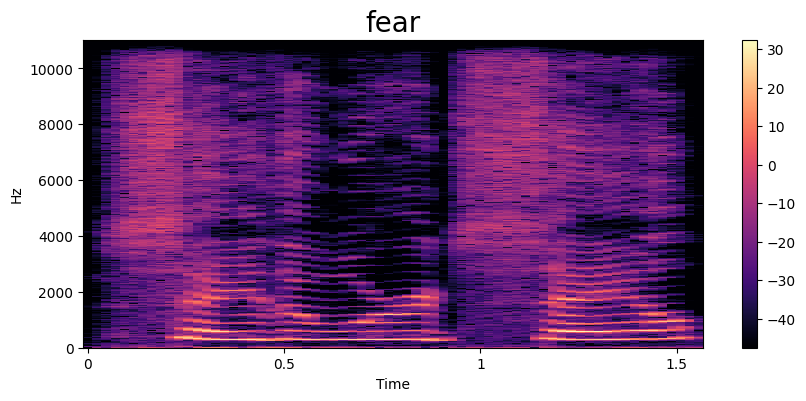

In [ ]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

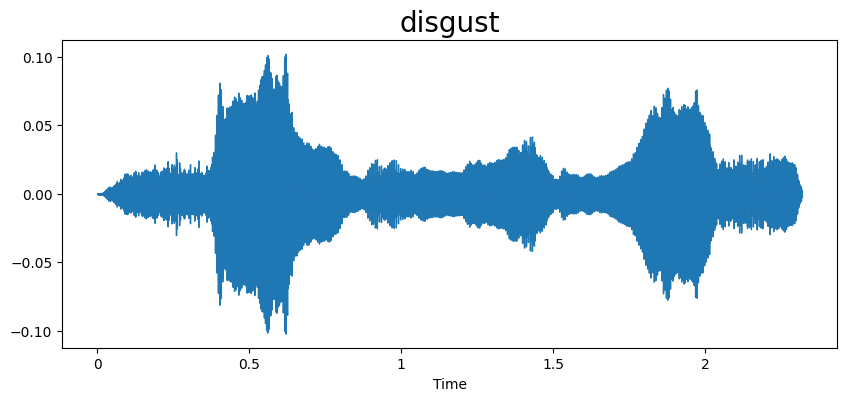

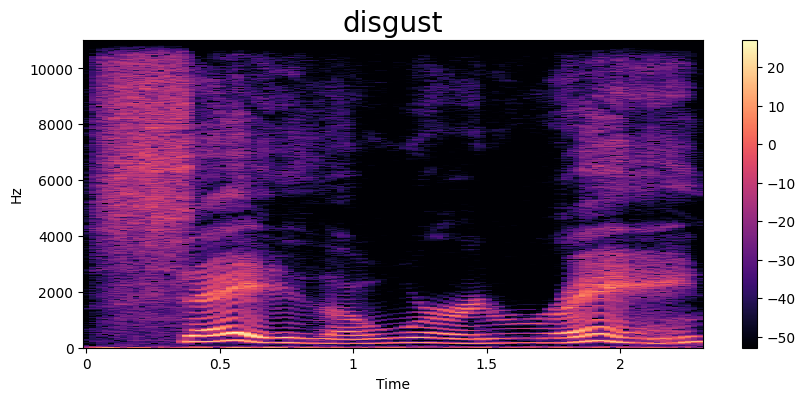

In [ ]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

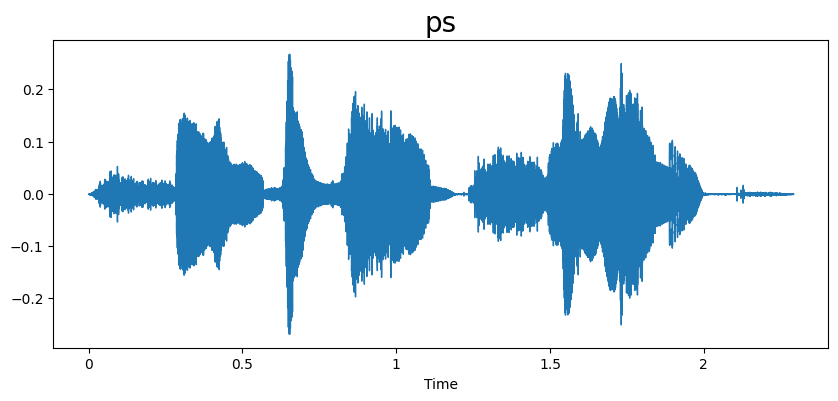

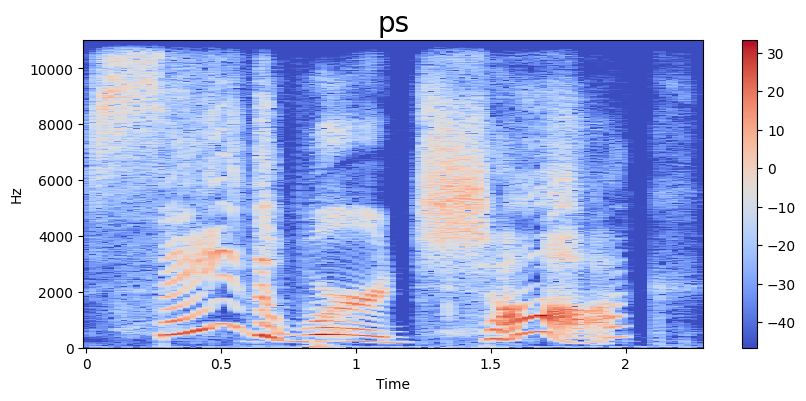

In [ ]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

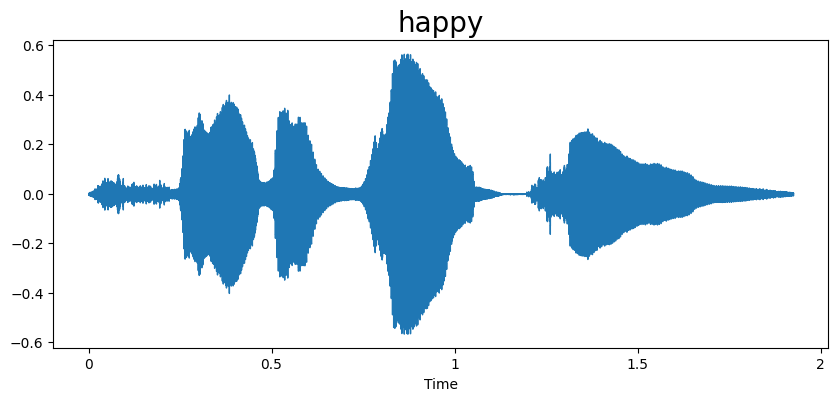

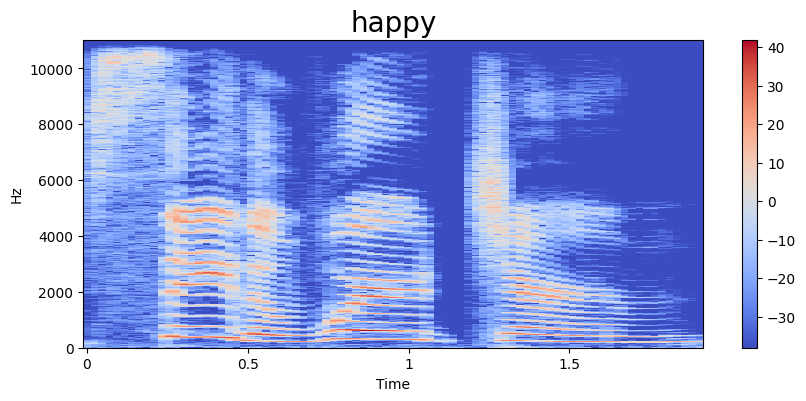

In [ ]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

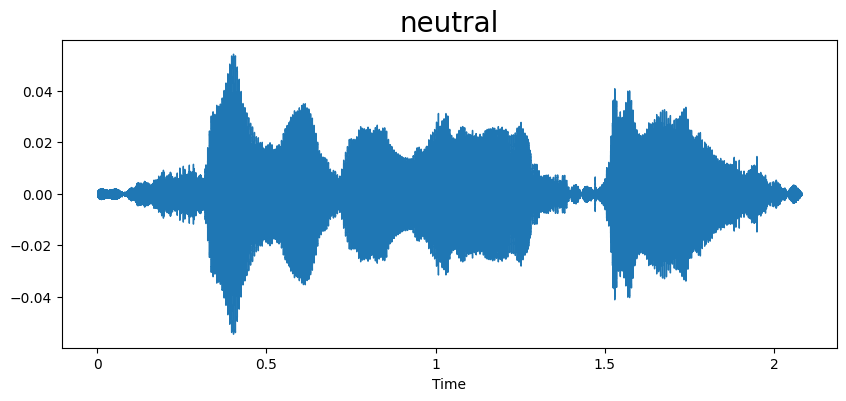

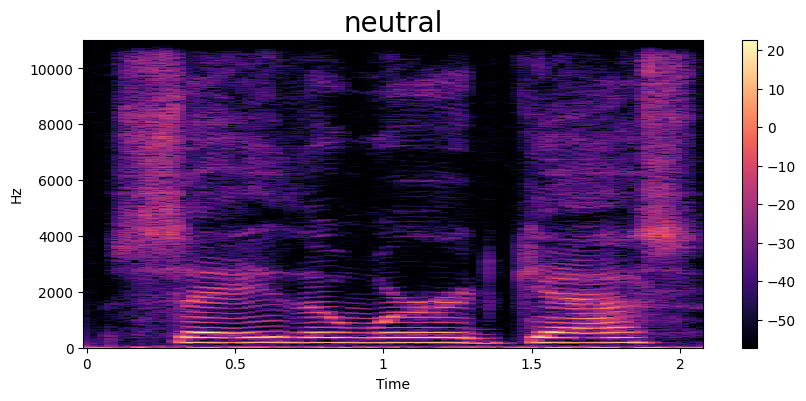

In [ ]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

# **Feature Extraction**

In [ ]:
def extract_mfcc(filename):
  y, sr = librosa.load(filename, duration = 3, offset= 0.5)
  mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc= 40).T, axis=0)
  return mfcc

In [ ]:
extract_mfcc(df['speech'][0])

array([-418.3699   ,   85.17869  ,   24.260214 ,   36.4116   ,
         -3.230713 ,    7.4758577,   -4.974261 ,  -10.288887 ,
          8.695558 ,   -6.8142424,   -5.9251127,   -2.360178 ,
         -7.553671 ,    9.259262 ,  -13.713553 ,    1.2253026,
          1.5797246,   -1.6978345,   -8.662093 ,   -2.984724 ,
         -5.9157486,   -7.3665395,   -3.2164469,    1.9674095,
         -3.2825391,    6.130838 ,   -2.7139792,    1.0424979,
         -1.3972652,   -0.4423034,    3.181221 ,   11.375088 ,
          7.873315 ,    5.4430213,    3.4363248,    2.3193414,
          2.9898553,    7.7627354,    5.53734  ,    8.532703 ],
      dtype=float32)

In [ ]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [ ]:
X_mfcc

,speech
0,"[-418.3699, 85.17869, 24.260214, 36.4116, -3.2..."
1,"[-401.18402, 75.4512, 26.104256, 46.837254, -3..."
2,"[-412.08948, 51.921978, 24.982533, 33.10084, 2..."
3,"[-427.31793, 106.55093, 39.606575, 24.632496, ..."
4,"[-419.82184, 105.9708, 26.913845, 39.985184, 9..."
...,...
2795,"[-389.76068, 76.22578, -12.164105, 16.117525, ..."
2796,"[-440.4106, 122.641045, -8.854474, 20.866735, ..."
2797,"[-457.91986, 91.389534, 6.4910216, 34.547867, ..."
2798,"[-397.97693, 89.60047, 7.5329833, 7.3120265, -..."


In [ ]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [ ]:
##input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [ ]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(df.label.values))
y

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [ ]:
y = np.array(y)
y.shape

(2800, 7)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# **Create the LSTM Model**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences = False, input_shape = (40, 1)),
    Dropout(0.5),
    Dense(128, activation = 'relu'),
    Dropout(0.5),
    Dense(64, activation = 'relu'),
    Dropout(0.5),
    Dense(7, activation = 'softmax')
])

# model = Sequential([
#     LSTM(123, return_sequences = False, input_shape = (40, 1)),
#     Dense(64, activation = 'relu'),
#     Dropout(0.2),
#     Dense(32, activation = 'relu'),
#     Dropout(0.2),
#     Dense(7, activation = 'softmax')
# ])

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 256)                 │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(X_train, y_train, validation_split = 0.2, epochs = 30, batch_size = 64)


Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 177ms/step - accuracy: 0.2254 - loss: 1.9207 - val_accuracy: 0.5561 - val_loss: 1.3677
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 169ms/step - accuracy: 0.4650 - loss: 1.3810 - val_accuracy: 0.7245 - val_loss: 0.8388
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 202ms/step - accuracy: 0.6278 - loss: 0.9794 - val_accuracy: 0.7883 - val_loss: 0.5725
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 212ms/step - accuracy: 0.7285 - loss: 0.7227 - val_accuracy: 0.8240 - val_loss: 0.4168
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 168ms/step - accuracy: 0.8006 - loss: 0.5890 - val_accuracy: 0.9260 - val_loss: 0.2793
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 237ms/step - accuracy: 0.8605 - loss: 0.4164 - val_accuracy: 0.8776 - val_loss: 0.3325
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 165ms/step - accuracy: 0.8573 - loss: 0.4541 - val_accuracy: 0.9413 - val_loss: 0.2130
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 163ms/step - accuracy: 0.9035 - loss: 0.3279 - val_accuracy: 0

# **Plot the Results**

<function matplotlib.pyplot.show(close=None, block=None)>

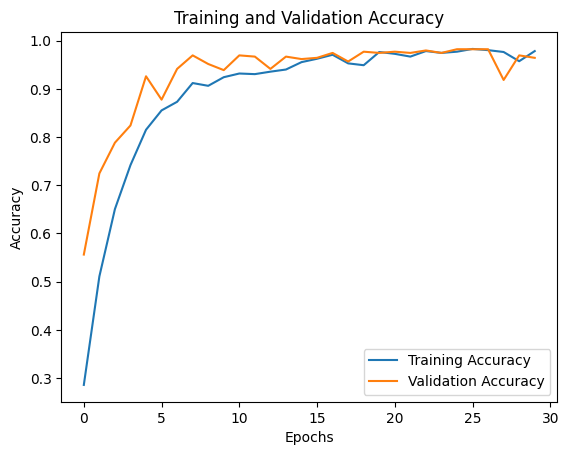

In [ ]:
epochs = list(range(30))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

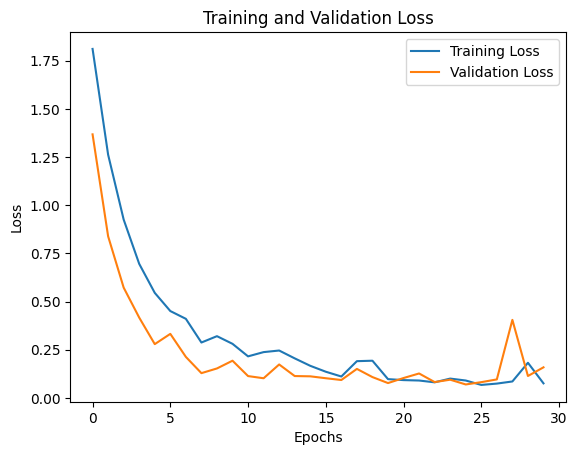

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show

In [ ]:
y_pred = model.predict(X)
y_pred_classes = np.argmax(y_pred, axis=1)
y_val_classes= np.argmax(y, axis=1)

88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_val_classes, y_pred_classes)
# printing the confusion matrix
print("Confusion Matrix")
print(cm)

Confusion Matrix
[[392   3   0   2   0   2   1]
 [  0 398   0   0   0   1   1]
 [  0   1 395   4   0   0   0]
 [  0   1   0 399   0   0   0]
 [  0   0   0   0 400   0   0]
 [  8   4   0  38   0 350   0]
 [  0   9   0   0   0   0 391]]


In [ ]:
# Classification Matrix
target_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'ps', 'sad']
print(" Classification Matrix")
print(classification_report(y_val_classes, y_pred_classes, target_names=target_names))

 Classification Matrix
              precision    recall  f1-score   support

       angry       0.98      0.98      0.98       400
     disgust       0.96      0.99      0.98       400
        fear       1.00      0.99      0.99       400
       happy       0.90      1.00      0.95       400
     neutral       1.00      1.00      1.00       400
          ps       0.99      0.88      0.93       400
         sad       0.99      0.98      0.99       400

    accuracy                           0.97      2800
   macro avg       0.97      0.97      0.97      2800
weighted avg       0.97      0.97      0.97      2800



Correlation HeatMap


<function matplotlib.pyplot.show(close=None, block=None)>

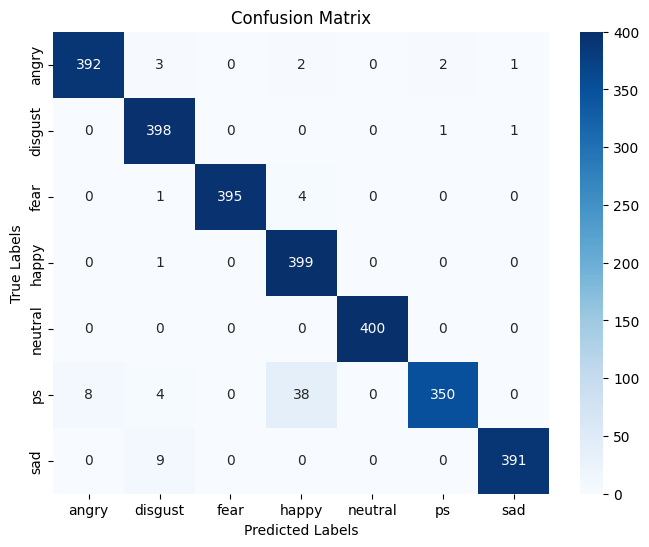

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show